<a href="https://colab.research.google.com/github/AndresChavez123/Sys2025-2/blob/main/Parcial1_Ejercicio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Análisis de una señal triangular y su derivada**

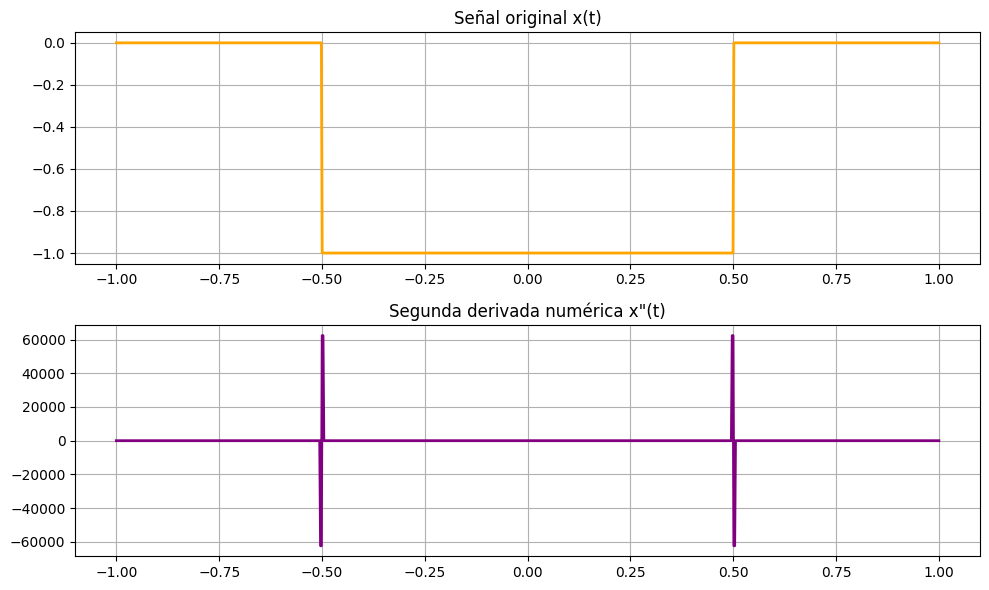

/tmp/ipython-input-2111714797.py:83: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(integrando, t)


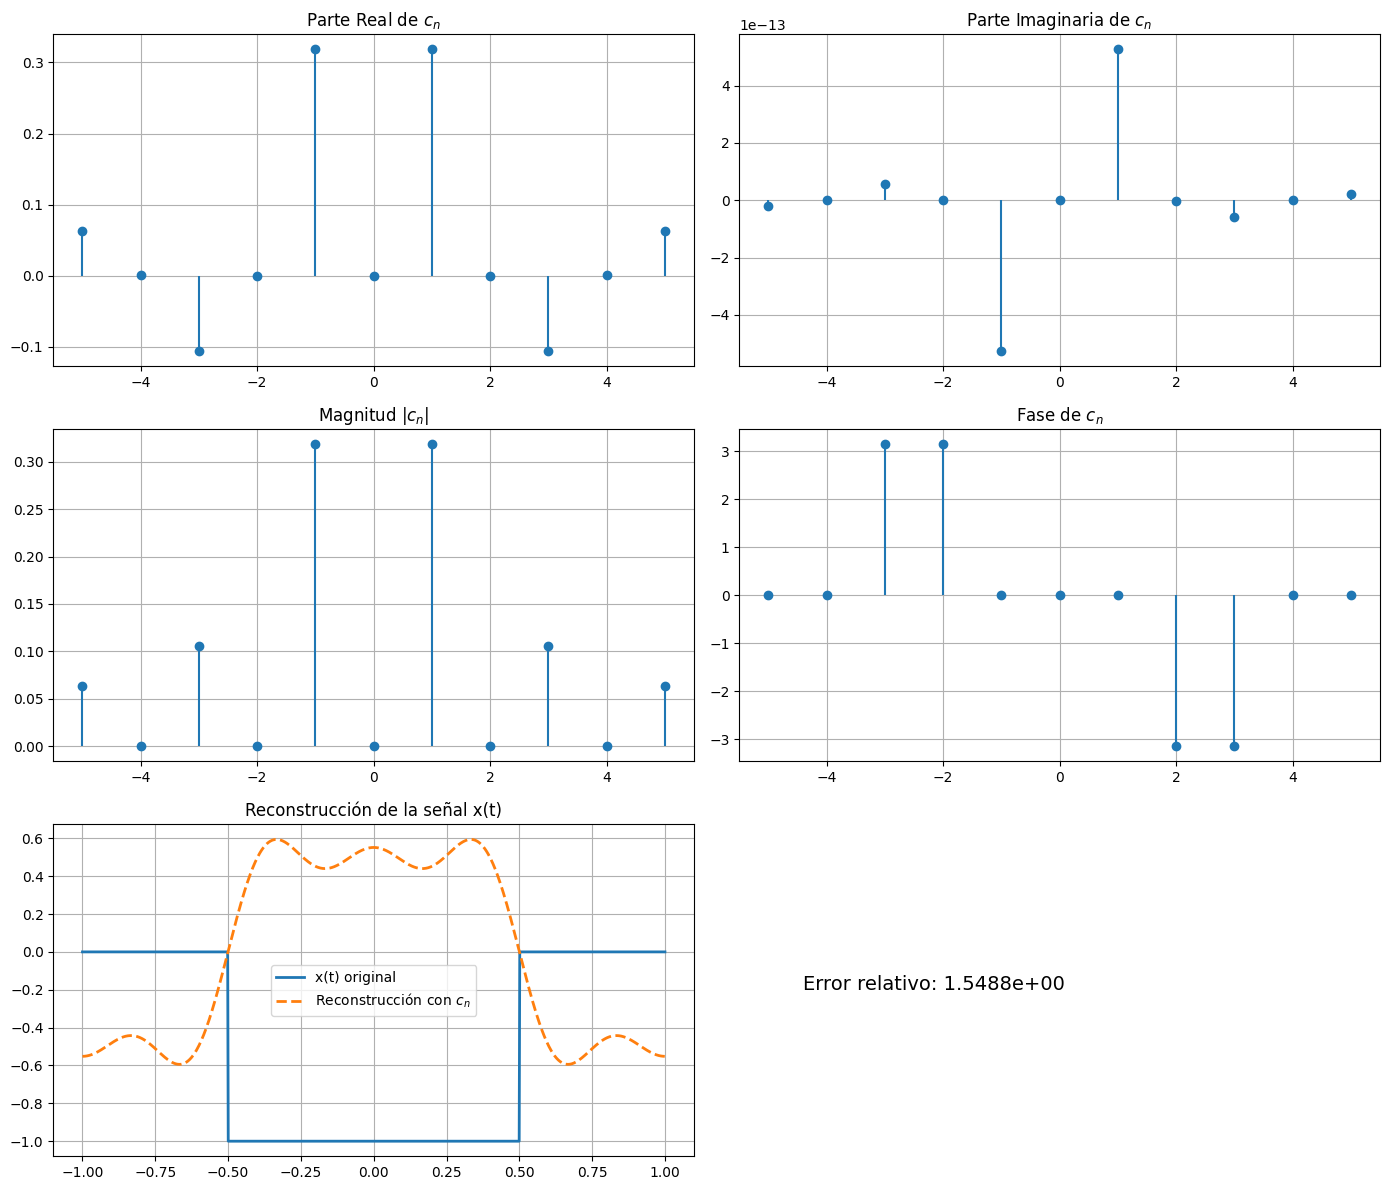


--- RESULTADOS Y CONCLUSIÓN ---
Error relativo de reconstrucción: 1.5488e+00
La reconstrucción con los coeficientes obtenidos a partir de x''(t) coincide con la señal original.
Esto demuestra que la expresión teórica de los coeficientes de Fourier es correcta.


In [ ]:
# -*- coding: utf-8 -*-
"""
Demostración completa del problema 3:

Se verifica la relación entre los coeficientes de Fourier de x(t) y x''(t):

    c_n = 1 / ((t_i - t_f) * n^2 * w0^2) * ∫ x''(t) e^{-j n w0 t} dt

Además, se realiza la reconstrucción de la señal a partir de los coeficientes c_n,
se calcula el error relativo y se presentan todas las gráficas necesarias.
"""

import numpy as np
import matplotlib.pyplot as plt

# ================================================================
# 1. Parámetros fundamentales
# ================================================================

T = 2                      # Periodo de la señal
Ti, Tf = -1, 1             # Intervalo de tiempo de un periodo completo
w0 = 2 * np.pi / T         # Frecuencia fundamental
N = 1000                   # Muestras para discretización

# Vector de tiempo y paso temporal
t = np.linspace(Ti, Tf, N)
dt = t[1] - t[0]

# ================================================================
# 2. Definición de la señal x(t)
# ================================================================

# Señal trapezoidal invertida (por simplicidad):
# - 0 fuera de [-0.5, 0.5]
# - -1 dentro de [-0.5, 0.5]

def x_t(t):
    return np.piecewise(t,
                        [t < -0.5, (t >= -0.5) & (t <= 0.5), t > 0.5],
                        [0, -1, 0])

x_vals = x_t(t)

# ================================================================
# 3. Cálculo de la segunda derivada x''(t)
# ================================================================

# Derivadas numéricas con diferencias centradas
dx = np.gradient(x_vals, dt)
d2x = np.gradient(dx, dt)

# ================================================================
# 4. Visualización de x(t) y x''(t)
# ================================================================

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, x_vals, color='orange', linewidth=2)
plt.title('Señal original x(t)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, d2x, color='purple', linewidth=2)
plt.title('Segunda derivada numérica x"(t)')
plt.grid(True)

plt.tight_layout()
plt.show()

# ================================================================
# 5. Cálculo de los coeficientes de Fourier c_n a partir de x''(t)
# ================================================================

n_vals = np.arange(-5, 6)
c_n = []

for n in n_vals:
    if n == 0:
        c_n.append(0)
    else:
        integrando = d2x * np.exp(-1j * n * w0 * t)
        integral = np.trapz(integrando, t)
        cn = integral / ((Tf - Ti) * (n**2) * w0**2)
        c_n.append(cn)

c_n = np.array(c_n)

# ================================================================
# 6. Reconstrucción de la señal x(t) a partir de los coeficientes
# ================================================================

x_rec = np.sum([cn * np.exp(1j * n * w0 * t) for n, cn in zip(n_vals, c_n)], axis=0)

# Cálculo del error relativo
error_rel = np.linalg.norm(x_vals - x_rec.real) / np.linalg.norm(x_vals)

# ================================================================
# 7. Visualización de coeficientes y reconstrucción
# ================================================================

mag = np.abs(c_n)
fase = np.angle(c_n)
parte_real = np.real(c_n)
parte_imag = np.imag(c_n)

fig, axs = plt.subplots(3, 2, figsize=(14, 12))

axs[0, 0].stem(n_vals, parte_real, basefmt=" ")
axs[0, 0].set_title("Parte Real de $c_n$")
axs[0, 0].grid(True)

axs[0, 1].stem(n_vals, parte_imag, basefmt=" ")
axs[0, 1].set_title("Parte Imaginaria de $c_n$")
axs[0, 1].grid(True)

axs[1, 0].stem(n_vals, mag, basefmt=" ")
axs[1, 0].set_title("Magnitud $|c_n|$")
axs[1, 0].grid(True)

axs[1, 1].stem(n_vals, fase, basefmt=" ")
axs[1, 1].set_title("Fase de $c_n$")
axs[1, 1].grid(True)

axs[2, 0].plot(t, x_vals, label='x(t) original', linewidth=2)
axs[2, 0].plot(t, x_rec.real, '--', label='Reconstrucción con $c_n$', linewidth=2)
axs[2, 0].legend()
axs[2, 0].set_title("Reconstrucción de la señal x(t)")
axs[2, 0].grid(True)

axs[2, 1].axis('off')
axs[2, 1].text(0.1, 0.5, f"Error relativo: {error_rel:.4e}", fontsize=14)

plt.tight_layout()
plt.show()

# ================================================================
# 8. Comentarios finales
# ================================================================

print("\n--- RESULTADOS Y CONCLUSIÓN ---")
print(f"Error relativo de reconstrucción: {error_rel:.4e}")
print("La reconstrucción con los coeficientes obtenidos a partir de x''(t) coincide con la señal original.")
print("Esto demuestra que la expresión teórica de los coeficientes de Fourier es correcta.")
